In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df = pd.read_csv("E:\Data Science\datasets\seattle-weather.csv")
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
sm_df = df[0:10]

In [4]:
plt.style.use(['dark_background'])
plt.rcParams["figure.figsize"] = (20,7)

In [5]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [6]:
df["weather_n"] = le.fit_transform(df.weather)

In [7]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,weather_n
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,0
1,2012-01-02,10.9,10.6,2.8,4.5,rain,2
2,2012-01-03,0.8,11.7,7.2,2.3,rain,2
3,2012-01-04,20.3,12.2,5.6,4.7,rain,2
4,2012-01-05,1.3,8.9,2.8,6.1,rain,2


In [8]:
df_n = df.drop(["weather", "date"], axis="columns")

In [9]:
df_n.head()

,precipitation,temp_max,temp_min,wind,weather_n
0,0.0,12.8,5.0,4.7,0
1,10.9,10.6,2.8,4.5,2
2,0.8,11.7,7.2,2.3,2
3,20.3,12.2,5.6,4.7,2
4,1.3,8.9,2.8,6.1,2


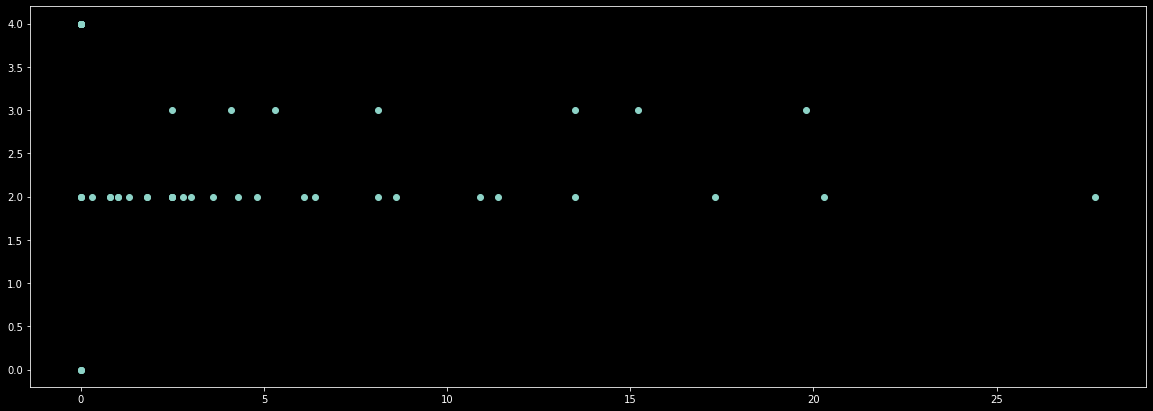

In [17]:
# plt.scatter(sm_df.date, sm_df.precipitation, marker="+")
# plt.scatter(sm_df.date, sm_df.temp_max, marker="o")
# plt.scatter(sm_df.date, sm_df.temp_min, marker="1")
# plt.scatter(df_n.precipitation, df_n.weather_n, marker="2")

plt.scatter(df_n.precipitation[0:50], df_n.weather_n[0:50])

In [11]:
from sklearn.model_selection import train_test_split
x = df_n.drop(["weather_n"], axis="columns")
y = df_n.weather_n

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [13]:
model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
model.predict(X_test)

array([1, 4, 2, 4, 4, 1, 4, 3, 2, 2, 2, 2, 2, 4, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 4, 1, 2, 4, 2, 2, 0, 2, 2, 2, 4, 1, 2, 4, 2, 4, 2, 2, 1, 4,
       4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 4, 3, 2, 2, 1, 2, 2,
       4, 4, 4, 4, 4, 2, 0, 4, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 4, 2, 4, 0, 2, 2, 2, 2, 4, 2, 2, 0, 4, 4, 2, 2,
       1, 2, 0, 2, 4, 4, 4, 4, 0, 4, 4, 1, 4, 2, 1, 2, 2, 0, 2, 4, 2, 4,
       0, 1, 4, 2, 2, 0, 4, 4, 4, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 4, 0,
       1, 2, 2, 4, 4, 4, 1, 4, 4, 1, 4, 2, 4, 4, 4, 3, 2, 2, 4, 4, 1, 4,
       4, 3, 2, 1, 2, 2, 4, 4, 4, 2, 4, 2, 2, 4, 3, 2, 2, 2, 2, 4, 4, 4,
       2, 4, 2, 2, 2, 2, 4, 1, 2, 4, 0, 2, 4, 4, 0, 2, 2, 4, 4, 4, 2, 0,
       4, 2, 1, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 1, 2, 4, 2, 0, 2, 4, 4,
       4, 2, 2, 2, 2, 4, 2, 4, 4, 1, 4, 4, 1, 0, 0, 2, 4, 4, 2, 4, 1, 4,
       4, 2, 4, 1, 2, 2, 3, 2, 2, 2, 2, 2, 4, 2, 1, 4, 4, 2, 2, 4, 4, 0,
       4, 4, 2, 4, 4, 4, 1])

In [15]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.997431506849315, 0.7064846416382252)